<a href="https://colab.research.google.com/github/AmandaSeebaluck/2024_Geoinformatique_I/blob/main/Copie_de_S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

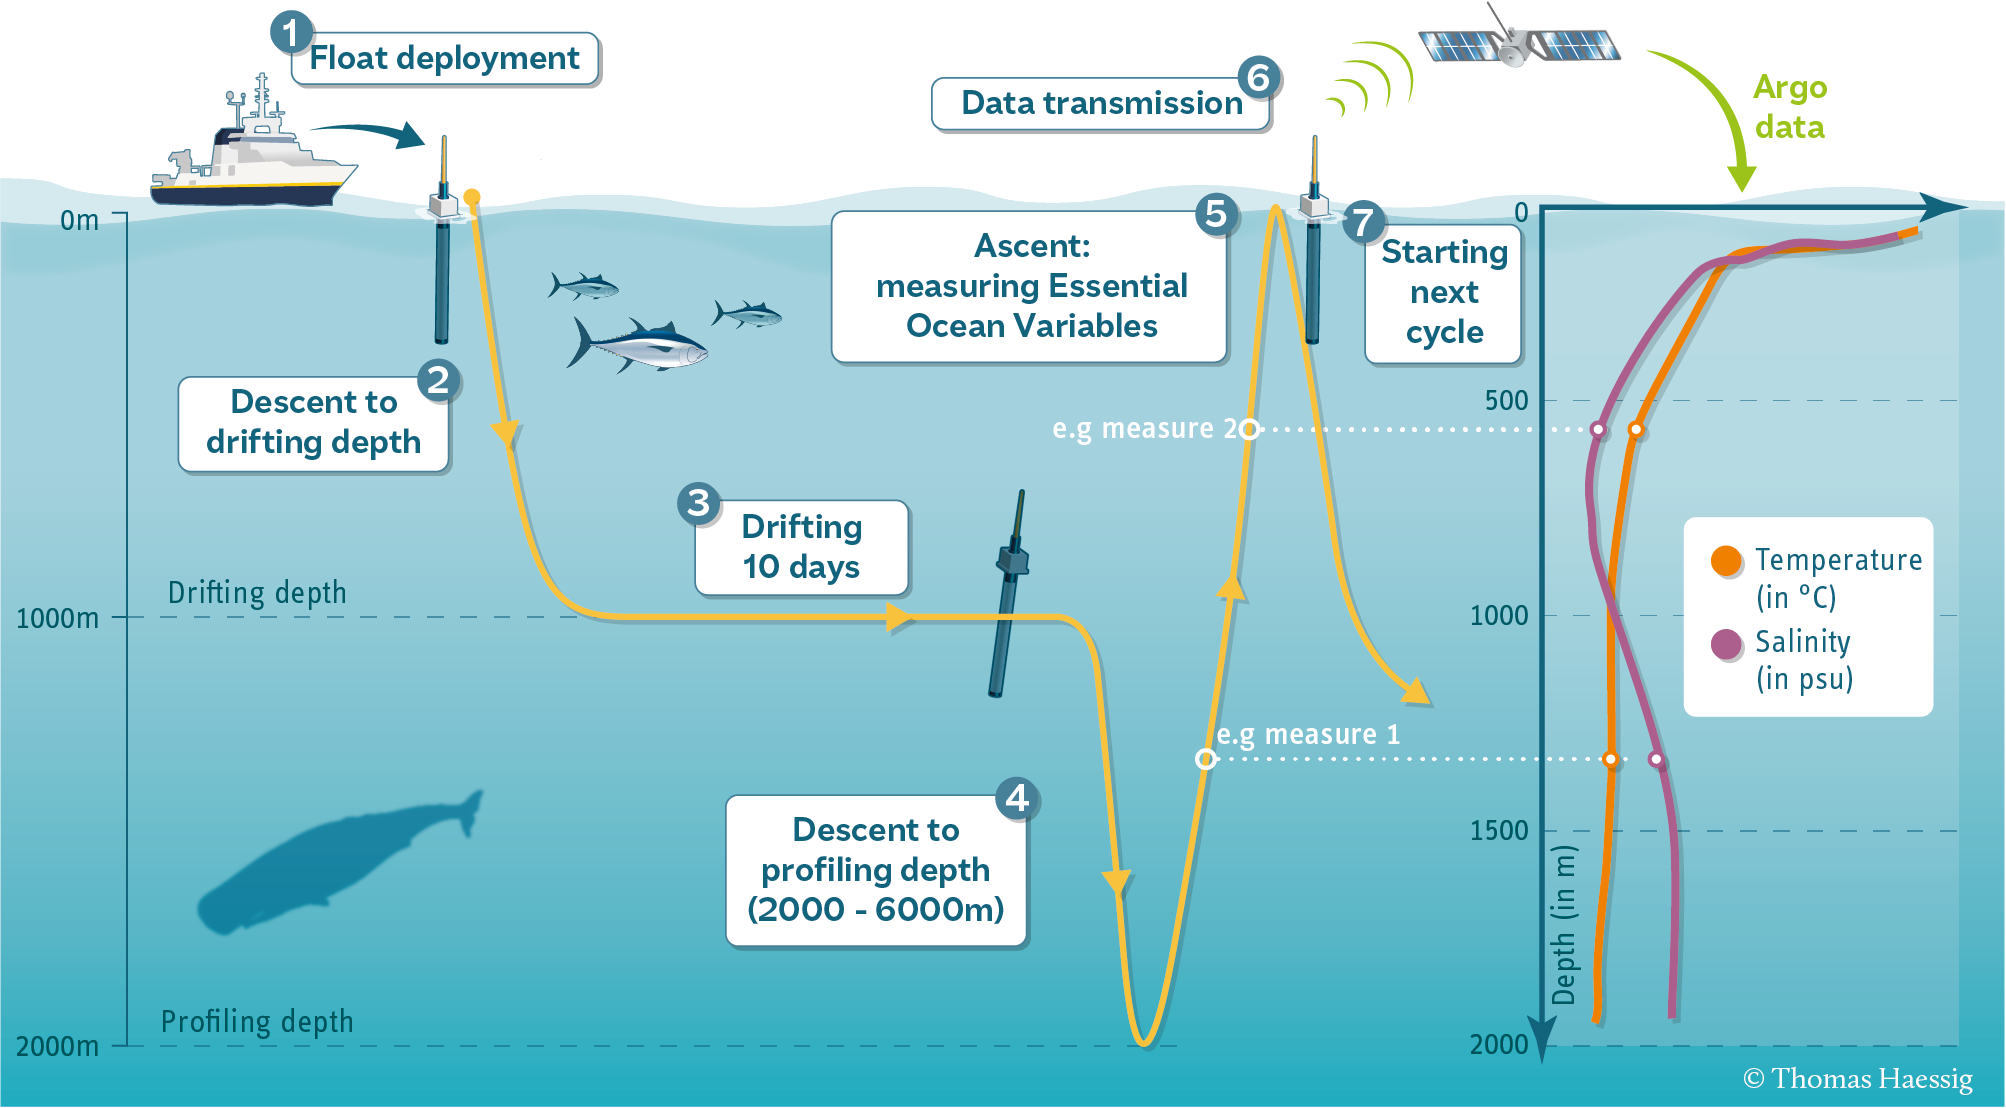


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [ ]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

import numpy as np


Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


In [ ]:
import numpy as np # importation de numpy

np.__version__ # version de numpy pour vérifier que c'est bien chargé


'1.26.4'

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des éléments des fichiers ici

In [ ]:
import numpy as np

# Initialiser des variables vides (none) pour chaque donnée :
T, S, P, date, lat, lon, level = None, None, None, None, None, None, None

# Vérifier l'ordre
print(files) # pour vérifier l'ordre dans files


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [ ]:
# Parcourir les fichiers dans "files" et charger chaque fichier selon son nom
date, T, level, lat, P, lon, S = [np.load(files[i]) for i in range(len(files))]

# les données chargées dans les variables respectives
print("Température : ", T)
print("Salinité : ", S)
print("Pression : ", P)
print("Latitude : ", lat)
print("Longitude : ", lon)
print("Date : ", date)
print("Niveau : ", level)


Température :  [[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]
Salinité :  [[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ...         nan 34.93680954
     

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [ ]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréer le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [ ]:
level_arange = np.arange(0, len(level))
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_arange)


Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [ ]:
level_linspace = np.linspace(0,len(level)-1,len(level))
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables chargées

In [ ]:
level_linspace.shape
print(level_linspace.shape) # afficher la taille (nbr ligne, nbr de colonne) du tableau

(78,)


In [ ]:
print(lon.shape)
print(lat.shape)
print(date.shape)
print(T.shape)
print(S.shape)
print(P.shape)
print(level.shape)

# il y a 75 points de longitude/latitude à une date
# on a 78 niveaux de profondeur avec 75 T, S et P

(75,)
(75,)
(75,)
(78, 75)
(78, 75)
(78, 75)
(78,)


D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [ ]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

print(a, b, c)

0.7718 -0.0844 -0.004561


Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [ ]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.3 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [ ]:
CT = CT_from_t(S, T, P) # Teta
print(CT)

[[18.95038389 18.41702486 19.07746816 ... 19.0838613  21.79604023
  20.10691816]
 [18.7167823  18.37902205 19.05973411 ... 18.44249588 19.43744461
  20.10022206]
 [18.34343364 18.3522886  19.04195407 ... 18.20006431 19.23615405
  20.05124564]
 ...
 [ 3.6359899   3.65662809  3.64478998 ...  3.64962307  3.65341962
   3.70166094]
 [ 3.60272526  3.61639726  3.59575608 ...  3.59259633  3.58470724
   3.6437391 ]
 [ 3.57826951  3.58028581  3.55956863 ...         nan  3.54839488
          nan]]


Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [ ]:
densite_relative = a*S + b*CT+ c*CT**2
print(densite_relative)

[[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [ ]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

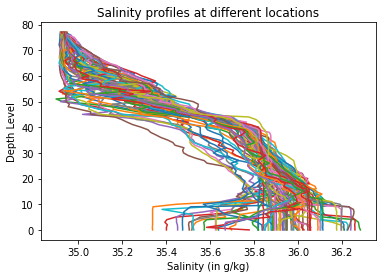

Text(0.5, 1.0, 'Salinity profiles at different locaitons')

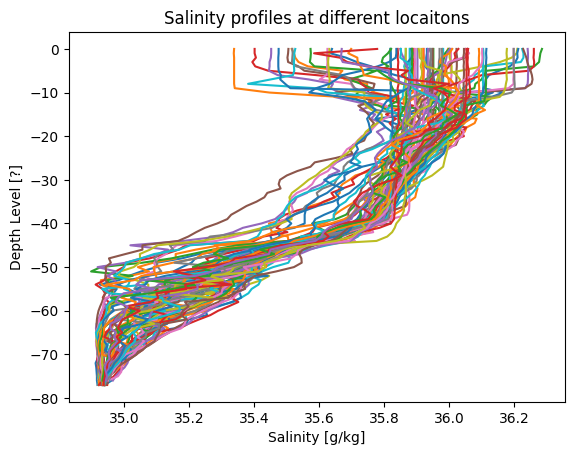

In [ ]:
plt.plot(S, -level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Salinity [g/kg]') # Prend une chaîne de caractères comme argument
plt.ylabel('Depth Level [?]')
plt.title('Salinity profiles at different locaitons')

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Temprature profiles at different locations')

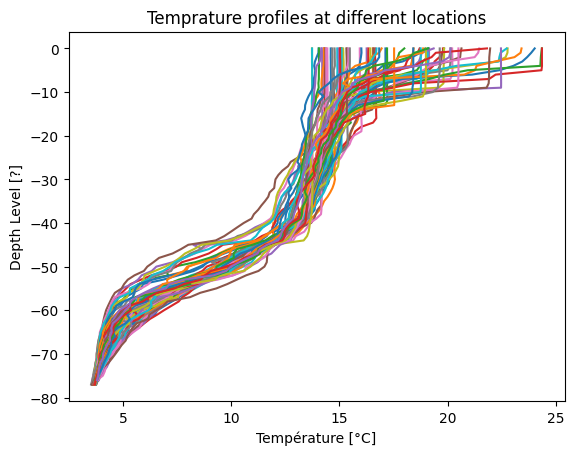

In [ ]:
plt.plot(T, -level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Température [°C]') # Prend une chaîne de caractères comme argument
plt.ylabel('Depth Level [?]')
plt.title('Temprature profiles at different locations')

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculer les moyennes...

In [ ]:
moyenne_T = np.mean(T,axis=1)
print(moyenne_T)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]


In [ ]:
moyenne_S = np.mean(S,axis=1)
print(moyenne_S)
moyenne_P = np.mean(P,axis=1)
print(moyenne_P)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
[   6.43466671           nan           nan         

... et les écarts types.

In [ ]:
ecart_type_T = np.std(T,axis=1)
print(ecart_type_T)
ecart_type_S = np.std(S,axis=1)
print(ecart_type_S)
ecart_type_P = np.std(P,axis=1)
print(ecart_type_P)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [ ]:
np.testing.assert_equal(moyenne_T.shape,level.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

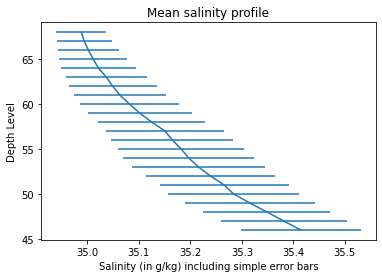

Text(0.5, 1.0, 'Profils de températures moyennes')

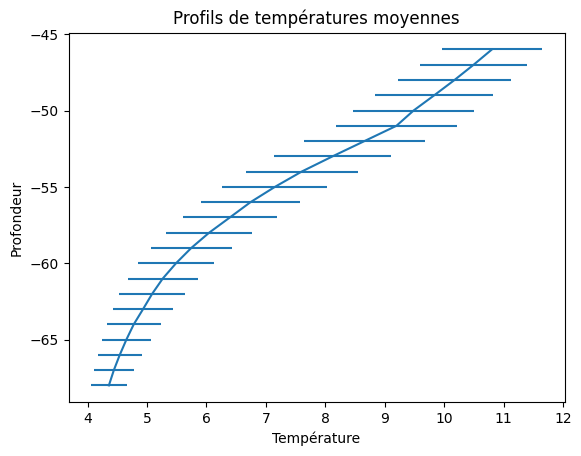

In [ ]:
plt.errorbar(moyenne_T, -level,xerr=ecart_type_T)
plt.xlabel('Température')
plt.ylabel('Profondeur')
plt.title('Profils de températures moyennes')

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'Profils de salinité moyennes')

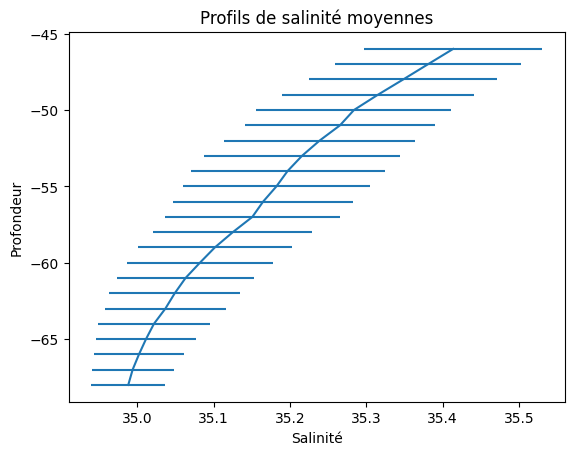

In [ ]:
plt.errorbar(moyenne_S, -level,xerr=ecart_type_S)
plt.xlabel('Salinité')
plt.ylabel('Profondeur')
plt.title('Profils de salinité moyennes')

Text(0.5, 1.0, 'Profils de pression moyennes')

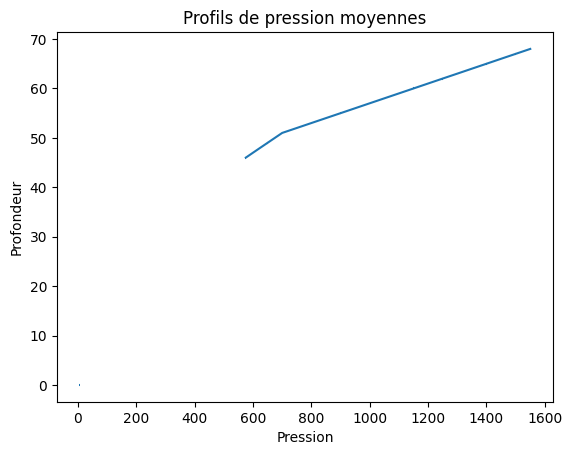

In [ ]:
plt.errorbar(moyenne_P, level,xerr=ecart_type_P)
plt.xlabel('Pression')
plt.ylabel('Profondeur')
plt.title('Profils de pression moyennes')

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [ ]:
nanmean_T = np.nanmean(T, axis=1)
print(nanmean_T)

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]


De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [ ]:
Nan_ecart_type_T = np.nanstd(T, axis=1)
print(Nan_ecart_type_T)

[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]


**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'ARGO float location')

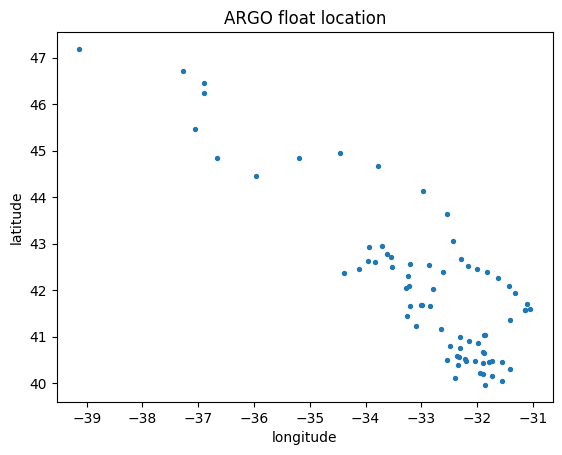

In [ ]:
plt.scatter(lon, lat, s=8)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('ARGO float location')

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [ ]:
# Write your code here
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
#write function here
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# créer une variable masse, qui est vide (none) au départ
mass=None
def convert_mass_Mterre(mass): # créer une fonction qui prend la masse comme paramètre
  return mass/planetdict['terre'] # je lui demande de retourner la masse d'entrée divisé par la masse de la terre (qui est dans le dico)

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict['jupiter']) # j'appelle ma fonction pour diviser jupiter

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(mass=None,ourplanet='jupiter') :
  return mass/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'], 'terre'),convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183 1.0


In [ ]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='mars') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments(Mjupiter,'mars'))

(0.16750418760469013, 1.557632398753894)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?